# Plotting with Pykat

This notebook is to give some examples of the builtin plotting. This can be very useful for just producing simple plots quickly. There is some flexibility provided to customise the plot. But if something more specific is required you'll have to resort to using Matplotlib yourself.

Firstly we'll run a simple cavity simulation to get some data to actually plot with:

In [1]:
import pykat

pykat.init_pykat_plotting()

from pykat import finesse

code = """
l l1 1 0 0 n1 
s s1 10 1 n1 n2
m m1 0.9 0.1 0 n2 n3
s s2 10 1 n3 n4
m m2 0.91 0.09 0 n4 n5

ad refl 0 n2
ad circ 0 n4
ad tran 0 n5
pd pd_cav n3

noplot refl

xaxis m2 phi lin 0 360 720
yaxis abs:deg
"""

kat = finesse.kat()
kat.parseCommands(code)

out = kat.run()

                                              ..-
    PyKat 0.8.10          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat

--------------------------------------------------------------
Running kat - Started at 2016-03-21 11:10:27.206950

Finished in 0:00:00.046323


The plotting is all done via the output object returned after running the simulation. The best source of information on what options are available is the plot function help.

In [2]:
help(out.plot)

Help on method plot in module pykat.finesse:

plot(detectors=None, filename=None, show=True, yaxis=None, legend=True, loc=0, title=None, styles=None, ylabel=None, y2label=None, xlabel=None, x2label=None) method of pykat.finesse.katRun instance
    This will generate a plot for the output data of this particular pykat run.
    It will attempt to generate a plot that shows all the various traces and plots
    by default for quick viewing of the data. Similar to that which would be
    generated by running the Finesse file from the command line.
    
    There are some additional keyword options to customise the plot output slightly:
    
        detectors:          a list of detectors that you want to plot
        filename:           providing a filename here will save the plot to a file.
                            The format is given by the extension provided.
        show:               True | False - whether to display the plot or not
        yaxis:              Set the Finesse yaxis

### Basic plot

This is the simplest option, you just call `out.plot()` and it will plot everything that has been outputted.

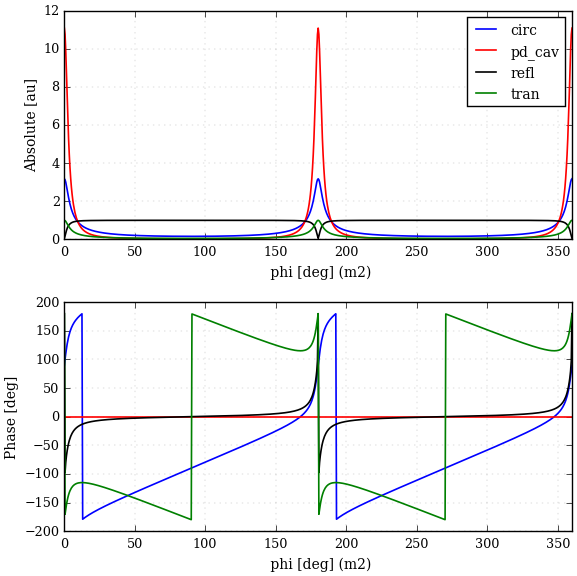

In [3]:
# Plot everything using default settings of the Finesse file
fig = out.plot()

## Changing y-axis

By default the plot function will use the `yaxis` set in the `kat.yaxis` object property. You can quickly change this (if you forgot to set it to a log scale, for example) then you can use the yaxis argument:

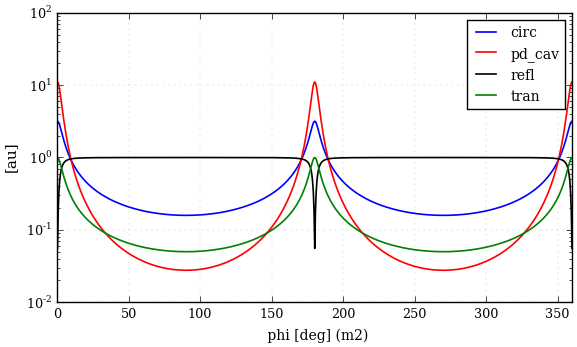

In [4]:
fig = out.plot(yaxis="log abs")

The yaxis value should be the same as used in a Finesse script (See http://www.gwoptics.org/finesse/reference/). You can also specify to see the phase information if available:

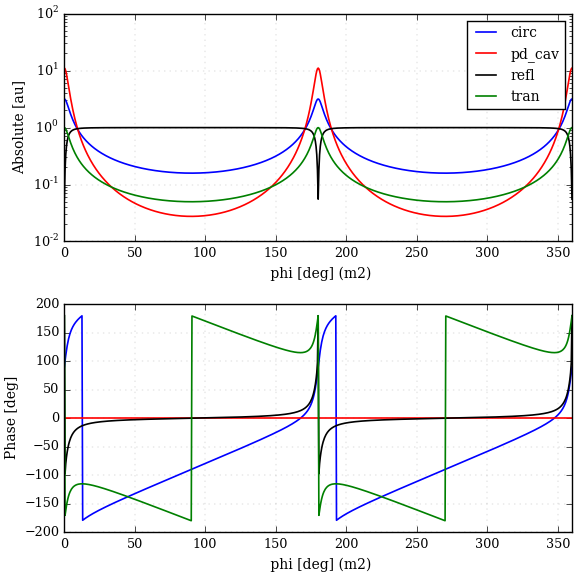

In [5]:
fig = out.plot(yaxis="log abs:deg")

## Plotting certain detectors

If you just want to see certain detector outputs from your simulation you can easily just list which outputs you want to see:

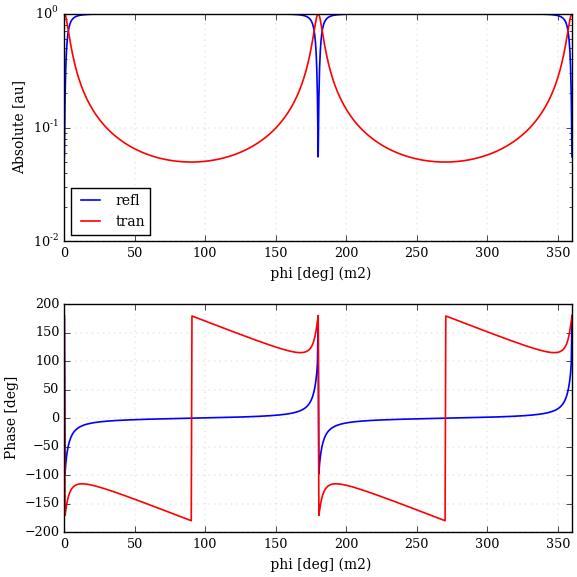

In [6]:
fig = out.plot(detectors=["refl","tran"],
               yaxis="log abs:deg")

## Changing styles

You change the style of each of the detector outputs by providing a dictionary of styles. The keys of this dictionary are the names of the output, the value is the usual matplotlib style string:

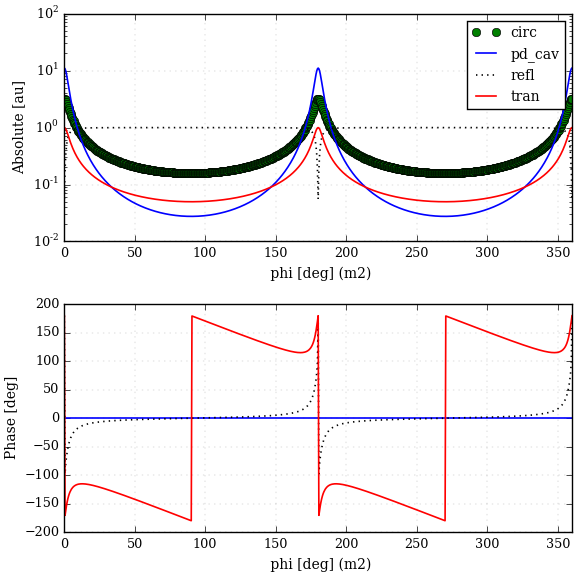

In [7]:
fig = out.plot(styles={"refl":'k:', 'circ':'go'},
               yaxis="log abs:deg")

## Labelling plots

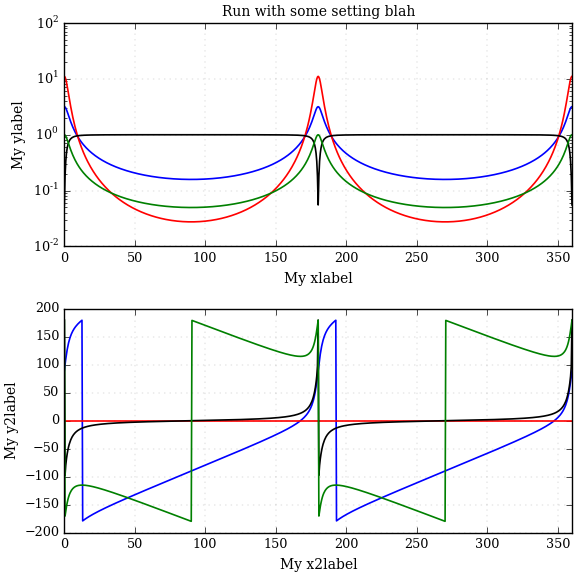

In [8]:
fig = out.plot(title="Run with some setting blah",
               yaxis="log abs:deg",
               ylabel="My ylabel",
               xlabel="My xlabel",
               y2label="My y2label",
               x2label="My x2label",
               legend=False)

## Saving to a file

You can save the final output to a file by specifying a filename and correct extension:

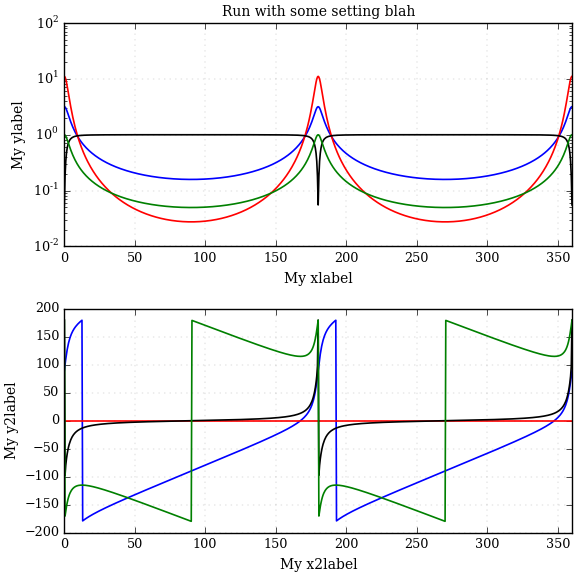

In [9]:
fig = out.plot(filename="my_plot.png",
               show = False,
               title="Run with some setting blah",
               yaxis="log abs:deg",
               ylabel="My ylabel",
               xlabel="My xlabel",
               y2label="My y2label",
               x2label="My x2label",
               legend=False)

Here is the plot shown in HTML using `<img src="my_plot.png"/>`:
<img src="my_plot.png"/>